In [35]:
#Replacing a Black-box model by a Global Single Tree Approximation
#A regression case
#Laurent Deborde 2019 march 23th

In [36]:
#here we ll try the global single tree approximation approach in a regression case

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import random as rd

In [38]:
#let's load the dataset (slightly modified to include the variables names as columns names in a single file)
d=pd.read_csv('winequality-white.csv', sep=';')

In [39]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [40]:
d.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [41]:
#we are want to illustrate the validity of the tree approxomatio approach, not "solve" the vino verde problem. So for the sake of simplicity we will suppress NaN data
d1=d.dropna()

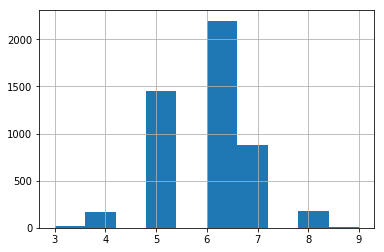

In [42]:
d1['quality'].hist()

In [43]:
#let's separate between train and test
y=d1['quality']
X=d1.drop('quality',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Let's first try a single tree on the train set

In [44]:
param_grid = {'max_depth': range(1,15)}
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [46]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.28


In [30]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.29


In [49]:
### fiting with those parameters on the whole training set
k=6
tree = DecisionTreeRegressor(max_depth=k)
tree.fit(X_train,y_train)
R2_appr=tree.score(X_train,y_train)
R2_test=tree.score(X_test,y_test)
print('for a depth of',k)
print("R2 on training set is {:.2f}".format(R2_appr))
print("R2 on test set is {:.2f}".format(R2_test))

for a depth of 6
R2 on training set is 0.42
R2 on test set is 0.31


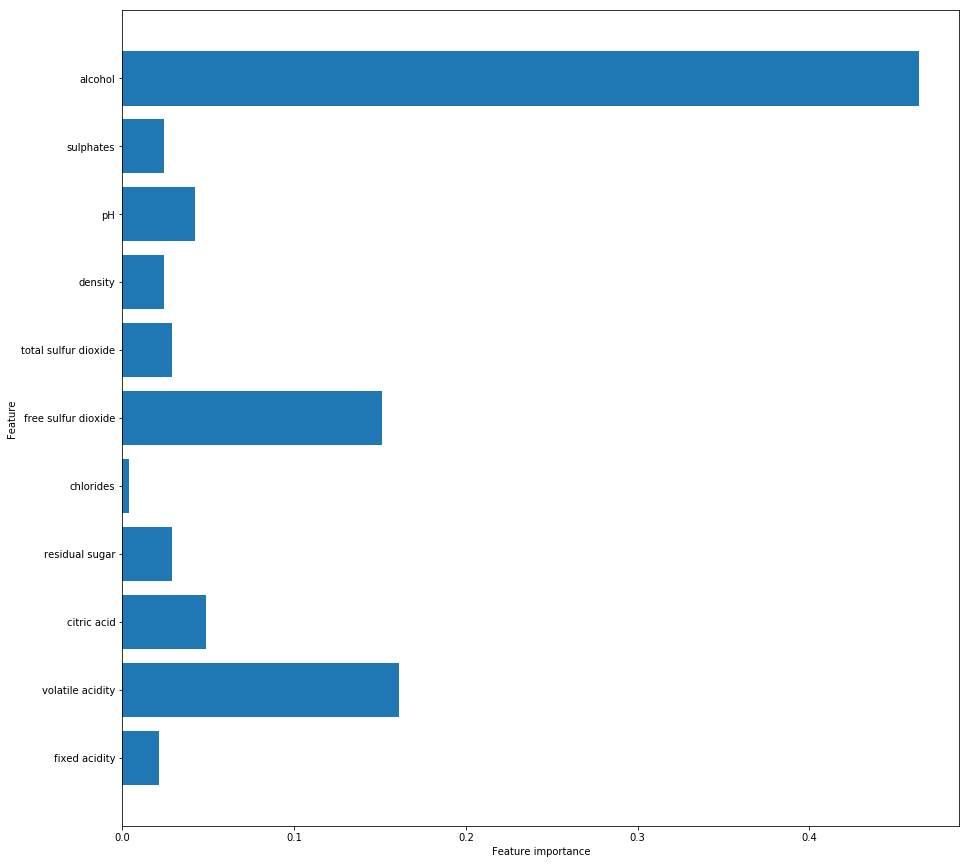

In [50]:
# adapted from Muller & Guido 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

def plot_feature_importances(model, Frame):
    plt.clf()
    n_features=len(Frame.columns)
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Frame.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances(tree,X_train)
plt.show()  

# Let's try a Random forest

In [52]:
param_grid = {'max_depth': [1,2,3,4,5,6, 7,8, 9, 10, 11, 12, None], 'max_features': [3, 5,10,None]}
from sklearn.ensemble import RandomForestRegressor
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'max_depth': None, 'max_features': 3}
Best cross-validation score: 0.44
Test set score: 0.51


In [53]:
rdf = RandomForestRegressor(max_depth=None, max_features= 3)
rdf.fit(X_train,y_train)
print("R2 out of sample {:.2f}".format(rdf.score(X_test,y_test)))

R2 out of sample 0.50


# Let's try a Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

#### with gridSearch (wich is a bit long)

In [55]:
param_grid = {'max_depth': [1,2,3,5,None],'max_features': [3,5,10,None],'learning_rate' : [0.03,0.05,0.1,0.2]}
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'learning_rate': 0.05, 'max_depth': None, 'max_features': 3}
Best cross-validation score: 0.51
Test set score: 0.56


#### fit on the whole training set

In [68]:
gbr = GradientBoostingRegressor(max_depth =None,max_features=3,learning_rate=0.05)
gbr.fit(X_train,y_train)
print("le R2 in sample est de {:.2f}".format(gbr.score(X_train,y_train)))
print("et le R2 out of sample est de {:.2f}".format(gbr.score(X_test,y_test)))

le R2 in sample est de 1.00
et le R2 out of sample est de 0.56


### The RF and GB are much better than the single tree at predecting the wine quality. Let's suppose we are not allowed to use those black box models. We still can build a simple yet improved tree, by using the knowledge provided by the black box. 

# First generate unlabeled data points "similar" to those of the training set

## we use a multivariate gaussian distribution estimated on the training set

In [57]:
echmean=X_train.mean(axis=0)

In [59]:
# let's compute covariance on the training set
echcov= X_train.cov()

In [60]:
# let's now randomly draw points
X_virt= np.random.multivariate_normal(echmean, echcov, 100000, check_valid ='warn')

In [61]:
print(X_virt.shape)

(100000, 11)


In [62]:
d_virt=pd.DataFrame(X_virt, columns=X_train.columns)
d_virt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.864985,0.279465,0.333350,6.450871,0.045577,35.272664,138.484540,0.994080,3.189608,0.489310,10.503121
std,0.849752,0.101685,0.120118,5.131988,0.021220,16.778241,42.104778,0.003031,0.149258,0.113389,1.233376
min,2.889589,-0.166731,-0.224860,-15.235920,-0.056763,-37.487850,-44.126767,0.979860,2.519409,-0.009918,5.423965
25%,6.292101,0.211125,0.251828,2.989215,0.031297,24.042063,109.949742,0.992040,3.089487,0.412999,9.670512
50%,6.866787,0.279320,0.333470,6.444367,0.045684,35.282912,138.491812,0.994073,3.189414,0.488819,10.503024
75%,7.434753,0.348098,0.414126,9.900989,0.059867,46.541598,166.805674,0.996118,3.290853,0.566075,11.332737
max,10.668146,0.712350,0.883823,28.425951,0.137364,111.722872,328.219216,1.007085,3.844140,0.973187,16.521344


### Here is the trick : let's label those new data using the black box model as an oracle

In [64]:
y_virt=gbr.predict(d_virt)

In [65]:
print(y_virt)

[5.33091855 5.94922479 5.95162938 ... 6.4448302  6.52707485 6.02740273]


### Now let's try a single tree on those numerous virtual datas (we don't bother to add the true training set since it's so small compared to the virtual one)

In [66]:
for i in range (4,15):
    tree = DecisionTreeRegressor(max_depth=i,random_state=42)
    score=cross_val_score(tree,d_virt,y_virt,cv=5).mean() 
    print("k=",i,"average cross-validation score: {:.2f}".format(score))

k= 4 average cross-validation score: 0.63
k= 5 average cross-validation score: 0.69
k= 6 average cross-validation score: 0.74
k= 7 average cross-validation score: 0.76
k= 8 average cross-validation score: 0.79
k= 9 average cross-validation score: 0.80
k= 10 average cross-validation score: 0.82
k= 11 average cross-validation score: 0.83
k= 12 average cross-validation score: 0.83
k= 13 average cross-validation score: 0.83
k= 14 average cross-validation score: 0.83


### The trees fit quite well the virtual data. But the important question is : do they fit the true training set ? 

In [76]:
# Optimum seems ton be around 11 but that makes a quite complicated tree. Let's limit it to 8
k=11
tree = DecisionTreeRegressor(max_depth=k)
tree.fit(d_virt,y_virt)
R2_appr=tree.score(X_train,y_train)
R2_test=tree.score(X_test,y_test)
print('pour une profondeur de',k)
print("le R2 sur l'échantillon d'apprentissage original est de {:.2f}".format(R2_appr))
print("et le R2 sur le vrai échantillon de test est de {:.2f}".format(R2_test))

pour une profondeur de 11
le R2 sur l'échantillon d'apprentissage original est de 0.43
et le R2 sur le vrai échantillon de test est de 0.37


### better than the initial tree, but much lower thant the best models. 

In [71]:
# essayons avec les prévisions du random forest
z_virt=rdf.predict(d_virt)

In [73]:
for i in range (5,12):
    tree1 = DecisionTreeRegressor(max_depth=i,random_state=42)
    score=cross_val_score(tree1,d_virt,z_virt,cv=5).mean() 
    print("k=",i,"average cross-validation score: {:.2f}".format(score))

k= 5 average cross-validation score: 0.58
k= 6 average cross-validation score: 0.62
k= 7 average cross-validation score: 0.65
k= 8 average cross-validation score: 0.67
k= 9 average cross-validation score: 0.69
k= 10 average cross-validation score: 0.70
k= 11 average cross-validation score: 0.70


In [75]:
# #the trees dont fit the artificial data very well. 
# still let's look at the performance on the test set
k=10
tree1 = DecisionTreeRegressor(max_depth=k)
tree1.fit(d_virt,y_virt)
R2_appr=tree1.score(X_train,y_train)
R2_test=tree1.score(X_test,y_test)
print('pour une profondeur de',k)
print("le R2 sur l'échantillon d'apprentissage original est de {:.2f}".format(R2_appr))
print("et le R2 sur le vrai échantillon de test est de {:.2f}".format(R2_test))

pour une profondeur de 10
le R2 sur l'échantillon d'apprentissage original est de 0.41
et le R2 sur le vrai échantillon de test est de 0.36


## Better than the original tree, but by a thin margin. A larger number of additionnal data would probably help, but will lengthen the computing time. Let's try this with a determinist strategy to generate additionnal data.

###  Rather than gaussian random draws, we will use a deterministic procedure : take the middle point between each pair of initial data (that will be a huge number of points in that case)

In [78]:
long=len(X_train)
court=len(X_train.columns)
X_virt=np.zeros((long*long,court))
X_val=X_train.values
for i in range(long):
    for j in range(long):
        for k in range(court):
            X_virt[i+long*j,k]=(X_val[i,k]+X_val[j,k])/2
d_virt=pd.DataFrame(X_virt, columns=X_train.columns)
d_virt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.349093e+07,1.349093e+07,1.349093e+07,1.349093e+07,1.349093e+07,1.349093e+07,1.349093e+07,1.349093e+07,1.349093e+07,1.349093e+07,1.349093e+07
mean,6.865369e+00,2.791778e-01,3.332072e-01,6.437912e+00,4.559406e-02,3.518296e+01,1.383041e+02,9.940657e-01,3.189363e+00,4.895426e-01,1.051027e+01
std,5.987321e-01,7.180040e-02,8.493012e-02,3.634005e+00,1.497541e-02,1.188677e+01,2.971338e+01,2.139934e-03,1.057565e-01,8.029811e-02,8.699087e-01
min,3.800000e+00,8.000000e-02,0.000000e+00,6.000000e-01,9.000000e-03,3.000000e+00,1.000000e+01,9.871100e-01,2.720000e+00,2.200000e-01,8.000000e+00
25%,6.450000e+00,2.300000e-01,2.800000e-01,3.625000e+00,3.800000e-02,2.700000e+01,1.175000e+02,9.925400e-01,3.115000e+00,4.350000e-01,9.850000e+00
50%,6.850000e+00,2.700000e-01,3.250000e-01,6.100000e+00,4.300000e-02,3.450000e+01,1.375000e+02,9.939900e-01,3.185000e+00,4.800000e-01,1.045000e+01
75%,7.250000e+00,3.150000e-01,3.800000e-01,8.775000e+00,4.850000e-02,4.250000e+01,1.580000e+02,9.954650e-01,3.255000e+00,5.350000e-01,1.110000e+01
max,1.180000e+01,1.100000e+00,1.660000e+00,6.580000e+01,3.460000e-01,1.465000e+02,3.130000e+02,1.038980e+00,3.820000e+00,1.060000e+00,1.420000e+01


In [79]:
#let's label those points with the black box prediction
y_virt=gbr.predict(d_virt)

In [81]:
#as above, let(s fit a tree on those data (it will take time !)
for i in range (10,17):
    tree = DecisionTreeRegressor(max_depth=i,random_state=42)
    score=cross_val_score(tree,d_virt,y_virt,cv=5).mean() 
    print("k=",i,"average cross-validation score: {:.3f}".format(score))    

k= 7 average cross-validation score: 0.807
k= 8 average cross-validation score: 0.826
k= 9 average cross-validation score: 0.843
k= 10 average cross-validation score: 0.858
k= 11 average cross-validation score: 0.872
k= 12 average cross-validation score: 0.883
k= 13 average cross-validation score: 0.893
k= 14 average cross-validation score: 0.902


In [83]:
# Does the optimal tree fits well the real data ? 
k=14
tree = DecisionTreeRegressor(max_depth=k)
tree.fit(d_virt,y_virt)
R2_appr=tree.score(X_train,y_train)
R2_test=tree.score(X_test,y_test)
print('pour une profondeur de',k)
print("le R2 sur l'échantillon d'apprentissage original est de {:.2f}".format(R2_appr))
print("et le R2 sur le vrai échantillon de test est de {:.2f}".format(R2_test))

pour une profondeur de 14
le R2 sur l'échantillon d'apprentissage original est de 0.63
et le R2 sur le vrai échantillon de test est de 0.41


 #### We observe a marked improvement over both the initial tree and the tree obtained from a smaller number of artificial data. The  resulting tree is a bit complicated (deep). Is a less deep tree a good predictor ?

In [85]:
k=9
tree = DecisionTreeRegressor(max_depth=k)
tree.fit(d_virt,y_virt)
R2_appr=tree.score(X_train,y_train)
R2_test=tree.score(X_test,y_test)
print('pour une profondeur de',k)
print("le R2 sur l'échantillon d'apprentissage original est de {:.2f}".format(R2_appr))
print("et le R2 sur le vrai échantillon de test est de {:.2f}".format(R2_test))

pour une profondeur de 9
le R2 sur l'échantillon d'apprentissage original est de 0.41
et le R2 sur le vrai échantillon de test est de 0.35


In [86]:
# If we lower the depth of the tree we markedly lower performance. 